In [1]:
from manim import *
import jupyter_capture_output
from numpy import linalg as npl

video_scene = " -v WARNING --disable_caching belastung_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s belastung_Scene"

Manim Community v0.18.0.post0

Jupyter Capture Output v0.0.11


In [102]:
class BelastungTrajectorie(Mobject):
    def __init__(self, center = np.array([0, 0, 0]), x_range = [0, 100, 10], y_range = [0, 100, 10], x_length = 10, y_length = 5, **kwargs):
        super().__init__(**kwargs)

        x_coord = [1]
        y_coord = [10*i for i in range(11)]

        x_dict = dict(zip(x_coord, x_coord))
        y_dict = dict(zip(y_coord, y_coord))

        ax = Axes(x_range = x_range, y_range = y_range, x_length = x_length, y_length = y_length,
            axis_config = {"stroke_opacity": 1, "stroke_color": BLACK, "font_size": 24},# "font": "Times New Roman"}, 
            # y_axis_config = {"stroke_opacity": 1, "stroke_color": BLACK, "font_size": 24}, 
            tips = False
        ).move_to(center).add_coordinates(x_dict, y_dict).set_color(BLACK)

        x_label = Text("Perceived stress from 0 (min) to 100 (max)", color = BLACK, font_size = 18, font = "Times New Roman"
            ).rotate(PI/2).next_to(ax.y_axis.get_center(), 2*LEFT)
        self.add(ax, x_label)

Output saved by creating file at animations/belastung/belastung.mp4.


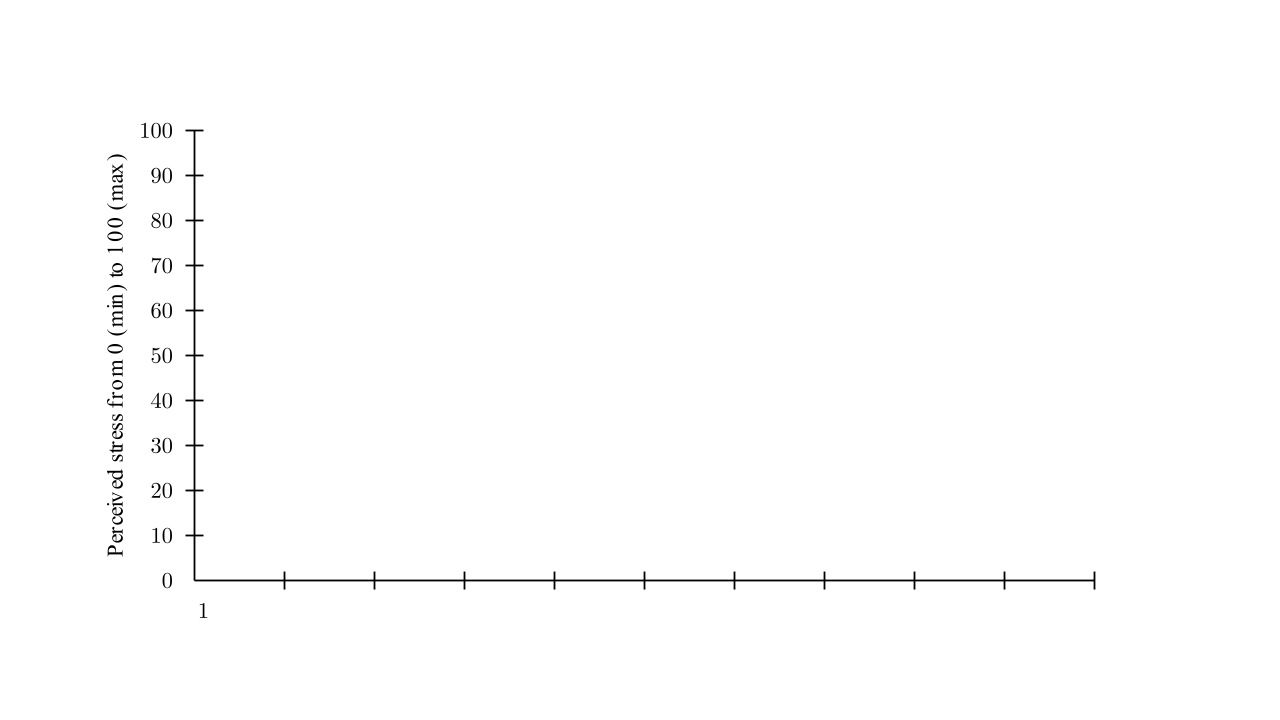

In [103]:
%%capture_video --path "animations/belastung/belastung.mp4"
%%manim -qm --fps 60 $video_scene


class belastung_Scene(Scene):
    def construct(self):
        self.camera.background_color = WHITE

        ax_belastung = BelastungTrajectorie()
        self.add(ax_belastung)